# Customer Segmentation (Synthetic)
KMeans clustering on synthetic 'Mall-like' data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df['Income_per_Age'] = df['Annual Income (k$)'] / (df['Age'] + 1)
df['Spend_to_Income'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']


In [5]:
le = LabelEncoder()
df['Gender_enc'] = le.fit_transform(df['Gender'])
features = ['Age','Annual Income (k$)','Spending Score (1-100)','Income_per_Age','Spend_to_Income','Gender_enc']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
labels_k = kmeans.labels_

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sil = silhouette_score(X_scaled, labels_k)
ch = calinski_harabasz_score(X_scaled, labels_k)
db = davies_bouldin_score(X_scaled, labels_k)
print(sil, ch, db)

0.3043270327300659 76.38783945401913 1.142615626552257


In [9]:
df['cluster_k'] = labels_k
cluster_profile = df.groupby('cluster_k')[features].mean().reset_index()

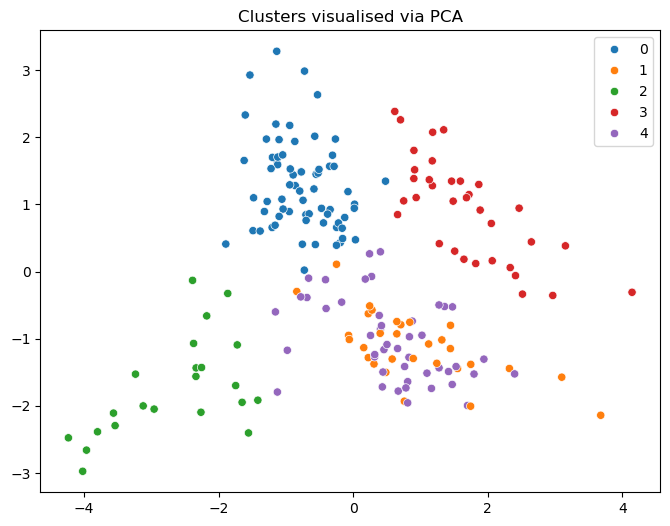

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_k, palette='tab10')
plt.title('Clusters visualised via PCA')
plt.show()